# Nonlinear Greybox System Identification 

In this notebook we attempt to do greybox type of nonlinear system identification. The starting point is the dynamic given by Thomas Price and John Butt in *Catalyst Poisoning and Fixed Bed Reactor Dynamic II: Adiabatic Reactors*. 
The starting assumptions are the following:
1. The input to the dynamic is the inlet temperature, the aromatic flow rate, the sulfur flow rate.
2. Diffusion dynamic on planar axis is neglected.
3. Partial differentiation with respect to horizontal axis is approximated by its backward numerical differentiation,
   i.e., 
   $$\left. \dfrac{\partial T}{\partial z}\right|_{z=z_i} \approx \frac{1}{\Delta z} \left[T(z_i) - T(z_{i-1})\right],\\
     \left.\dfrac{\partial^2 T}{\partial^2 z}\right|_{z=z_i} \approx \frac{1}{\Delta z} \left[\left. \dfrac{\partial T}{\partial z}\right|_{z=z_i} - \left. \dfrac{\partial T}{\partial z}\right|_{z=z_{i-1}}\right],\\
     \approx \frac{1}{(\Delta z)^2}\left[T(z_i) - 2T(z_{i-1}) + T(z_{i-2})\right]\\
   $$

The pde of the catalyst dynamic is given by:
$$
\dfrac{d s_i}{dt} = K_0 \dfrac{\partial^2 s_i}{\partial^2 z} -K_1 \dfrac{\partial s_i}{\partial z}  - K_2 r_s(s_i,T_i) c_i,\\
\dfrac{d a_i}{dt} = K_3 \dfrac{\partial^2 a_i}{\partial^2 z} -K_1 \dfrac{\partial a_i}{\partial z} - K_2 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d T_i}{dt} = K_4 \dfrac{\partial^2 T_i}{\partial^2 z} -K_5 \dfrac{\partial T_i}{\partial z} + K_6 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d c_i}{dt} = K_7 r_s(s_i,T_i) c_i,
$$
   


Let the reactor is partitioned into $N$ layers, where for each, the temperature corresponds to that layer is measured. The state each layer is given by (all is normalized):
1. $s_i$ Sulfur concentration.
2. $a_i$ Aromatic concentration.
3. $T_i$ Temperature.
4. $c_i$ Catalyst activity.

where here $i = 1, \cdots, N$.

The inputs to the reactor are given by
1. $s_0$ Sulfur concentration at inlet.
2. $a_0$ Aromatic concentration at inlet.
3. $T_0$ Temperature inlet.

For each $i = 1, \cdots, N$ the dyanmics are expressed as follows:
$$
\dfrac{d s_i}{dt} = K_0 \dfrac{1}{(\Delta z)^2} \left[s_i(t) -2 s_{i-1}(t) + s_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[s_i(t) - s_{i-1}(t)\right]  - K_2 r_s(s_i,T_i) c_i,\\
\dfrac{d a_i}{dt} = K_3 \dfrac{1}{(\Delta z)^2} \left[a_i(t) -2 a_{i-1}(t) + a_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[a_i(t) - a_{i-1}(t)\right] - K_2 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d T_i}{dt} = K_4 \dfrac{1}{(\Delta z)^2} \left[T_i(t) -2 T_{i-1}(t) + T_{i-2}(t)\right] -K_5 \dfrac{1}{\Delta z} \left[T_i(t) - T_{i-1}(t)\right] + K_6 r_a(a_i,T_i,c_i) c_i,\\
\dfrac{d c_i}{dt} = K_7 r_s(s_i,T_i) c_i,
$$
where 
$$
r_a = -d_1 \exp\left(-d_2/T_i\right) a_i c_i,\\
r_s = -d_3 \exp\left(-d_4/T_i\right)s_i %\dfrac{d_3 \exp\left((d_4-d_5)/T_i\right)s_i}{1+d_6 \exp(d_4/T_i)s_i}.
$$

In these dynamical equations, the constants $K_j$ and $d_j$ belongs to $\mathbb{R}^+$, to be estimated from the data via nonlinear optimization algorithm. We do not include noises model in the dynamics nor in the measurement model. We would handle this via stochastic smoothing or Gaussian processes system identification. These dynamics will be the starting point. It is assumed that initially $c_i = 1, \forall i$.

We then discretize the dynamics above in time, resulting in the following dynamics:
$$
s_i(t+1) = s_i(t)+K_0 \dfrac{1}{(\Delta z)^2} \left[s_i(t) -2 s_{i-1}(t) + s_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[s_i(t) - s_{i-1}(t)\right]  - K_2 r_s(s_i,T_i) c_i,\\
a_i(t+1) = a_i(t)+K_3 \dfrac{1}{(\Delta z)^2} \left[a_i(t) -2 a_{i-1}(t) + a_{i-2}(t)\right] -K_1 \dfrac{1}{\Delta z} \left[a_i(t) - a_{i-1}(t)\right] - K_2 r_a(a_i,T_i,c_i) c_i,\\
T_i(t+1) = T_i(t)+K_4 \dfrac{1}{(\Delta z)^2} \left[T_i(t) -2 T_{i-1}(t) + T_{i-2}(t)\right] -K_5 \dfrac{1}{\Delta z} \left[T_i(t) - T_{i-1}(t)\right] + K_6 r_a(a_i,T_i,c_i) c_i,\\
c_i(t+1) = c_i(t)+ K_7 r_s(s_i,T_i) c_i,
$$



We could start $u(t,z_i) = K_4 r_a(s_i(t),T_i(t)) c_i(t)$.

$$
c_i = c_i(0) \exp(\int r_s(t) dt)\\
u_i = -r_a(a_i,T_i,c_i) c_i(0) \exp(\int r_s(t) dt)\\
    = d_1 \exp\left(-d_2/T_i\right) a_i c_i(0)^2 \exp(2 \int r_s(t) dt)\\
    = d_1 \exp\left(-d_2/T_i\right) \exp(\alpha_i(t,z_i)) c_i(0)^2 \exp(2 \int r_s(t,z_i) dt)\\
\log(u_i) = \log(d_1) -d_2/T_i + \alpha_i(t,z_i) + 2\log(c_i(0)) + 2 \int r_s(t,z_i) dt\\
$$

### Load necessary libraries

In [366]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sys
import os
import pandas as pd
import datetime
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
Dtype = torch.float

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

Define discrete dynamics that will be used for system identification.

In [2]:
device

device(type='cuda')

In [362]:
'''
Discrete catalyst dynamics, with assumption that the number of layer is 7
The diffusion take into account here
'''
# @torch.jit.script
def catalyst_dynamics(x,u,n_levels,Delta_z,K,d):
    #input are the log
    d = torch.exp(d)
    K = torch.exp(K)
#     d = torch.max(d,torch.zeros_like(d))
#     d = torch.max(K,torch.zeros_like(K))
    
    s_in = u[0]
    a_in = u[1]
    T_in = u[2]

    #get the current states
    s = x[:n_levels]
    a = x[n_levels:2*n_levels]
    T = x[2*n_levels:3*n_levels]
    c = x[3*n_levels:]
    
    #create new state
    x_new = torch.zeros_like(x)
    s_new = x_new[:n_levels] #This is only view
    a_new = x_new[n_levels:2*n_levels]
    T_new = x_new[2*n_levels:3*n_levels]
    c_new = x_new[3*n_levels:]
    
    for i in range(n_levels):
        if i == 0:
            s_i_min_1 = s_in
            a_i_min_1 = a_in
            T_i_min_1 = T_in
            
            s_i_min_2 = s_in
            a_i_min_2 = a_in
            T_i_min_2 = T_in
        else:
            s_i_min_1 = s[i-1]
            a_i_min_1 = a[i-1]
            T_i_min_1 = T[i-1]
            if i==1:
                s_i_min_2 = s_in
                a_i_min_2 = a_in
                T_i_min_2 = T_in
            else:
                s_i_min_2 = s[i-2]
                a_i_min_2 = a[i-2]
                T_i_min_2 = T[i-2]
        
        Delta_s = (s[i] - s_i_min_1)/Delta_z[i]
        Delta_a = (a[i] - a_i_min_1)/Delta_z[i]
        Delta_T = (T[i] - T_i_min_1)/Delta_z[i]
        
        
        Delta2_s = (s[i] - 2*s_i_min_1 + s_i_min_2)/(Delta_z[i]*Delta_z[i])
        Delta2_a = (a[i] - 2*a_i_min_1 + a_i_min_2)/(Delta_z[i]*Delta_z[i])
        Delta2_T = (T[i] - 2*T_i_min_1 + T_i_min_2)/(Delta_z[i]*Delta_z[i])
        
        
        rA_i = rA(s[i],T[i],d)
        rS_i = rS(a[i],T[i],c[i],d)
        
        s_new[i] = s[i]+K[0]*Delta2_s - K[1]*Delta_s - K[2]*rS_i*c[i]
        a_new[i] = a[i]+K[3]*Delta2_a - K[1]*Delta_a - K[2]*rA_i*c[i]
        T_new[i] = T[i]+K[4]*Delta2_T - K[5]*Delta_T + K[6]*rA_i*c[i]
        c_new[i] = c[i]+K[7]*rS_i
        
        
    return x_new

# @torch.jit.script
def temperature_output(x,n_levels=7):
    return x[2*n_levels:3*n_levels]

'''
Aromatic reaction rate
'''
# @torch.jit.script
def rA(s,T,d):

    res =  -d[2]*torch.exp(-d[3]/T)*s;
#     res = res/(1+(d[4]*exp(d[3]/T)*s));
    return res

'''
Sulphur reaction rate
'''
# @torch.jit.script
def rS(a,T,c,d):
    res =  -d[0]*torch.exp(-d[1]/T)*a*c;
    return res

In [565]:
'''
Discrete catalyst dynamics, where the dispersion is not assumed
'''
# @torch.jit.script
def simple_catalyst_dynamics(x,u,n_levels,Delta_z,K,d):

    #input are the log
    d = torch.exp(d)
    K = torch.exp(K)
#     d = torch.max(d,torch.zeros_like(d))
#     d = torch.max(K,torch.zeros_like(K))
    
    s_in = u[0]
    a_in = u[1]
    T_in = u[2]

    #get the current states
    s = x[:n_levels]
    a = x[n_levels:2*n_levels]
    T = x[2*n_levels:3*n_levels]
    c = x[3*n_levels:]
    
    #create new state
    x_new = torch.zeros_like(x)
    s_new = x_new[:n_levels] #This is only view
    a_new = x_new[n_levels:2*n_levels]
    T_new = x_new[2*n_levels:3*n_levels]
    c_new = x_new[3*n_levels:]
    
    for i in range(n_levels):
        if i == 0:
            s_i_min_1 = s_in
            a_i_min_1 = a_in
            T_i_min_1 = T_in
            
        else:
            s_i_min_1 = s[i-1]
            a_i_min_1 = a[i-1]
            T_i_min_1 = T[i-1]
            
        
        Delta_s = (s[i] - s_i_min_1)/Delta_z[i]
        Delta_a = (a[i] - a_i_min_1)/Delta_z[i]
        Delta_T = (T[i] - T_i_min_1)/Delta_z[i]
        
        
        rA_i = rA(s[i],T[i],d)
        
        rS_i = rS(a[i],T[i],c[i],d)
        
        s_new[i] = s[i]- K[0]*Delta_s - K[1]*rS_i*c[i]
        a_new[i] = a[i]- K[0]*Delta_a - K[1]*rA_i*c[i]
        T_new[i] = T[i]- K[2]*Delta_T + K[3]*rA_i*c[i]
        c_new[i] = c[i]+K[4]*rS_i
        
        
    return x_new

Define costumized `Torch.nn` so that the parameter could be handled with `Torch.optim` algorithms

In [566]:
#use Torch nn structure for easy manipulation of gradient and update
class GreyIdentification(nn.Module):
    def __init__(self,device,n_levels,initial_state,K_init,d_init,input_scale_init,simple=False):
        super(GreyIdentification,self).__init__()
        self.n_levels = n_levels
        self.Delta_z = torch.tensor([1.,1.,1.,1.,1.,1.,1.],dtype=Dtype,device=device)
        self.input_scale = nn.Parameter(data=input_scale_init,requires_grad=True)
        self.K = nn.Parameter(data=K_init,requires_grad=True)
        self.d = nn.Parameter(data=d_init,requires_grad=True)
        self.initial_state = initial_state ##this can be estimated as well in the future
#         self.state = initial_state.clone()#state at current time
        self.useSimple = simple
        if self.useSimple:
            self.dynamics = simple_catalyst_dynamics
        else:
            self.dynamics = catalyst_dynamics
        
    
    '''
    forward, given a history of input u, the network will predict the history of output y
    '''
    def forward(self,u_hist):
        #first we need to sclae the input
        u_hist = torch.cat((torch.exp(self.input_scale),torch.tensor([1.],device=device)))*u_hist
        state = self.initial_state.clone()
        output_hist = torch.empty(u_hist.shape[0],self.n_levels,dtype=Dtype,device=device)
        output_hist[0,:] = temperature_output(state,self.n_levels)
        
        
        for i in range(u_hist.shape[0]-1):
            state = self.dynamics(state,u_hist[i,:],self.n_levels,self.Delta_z,self.K,self.d)
            output_hist[i+1,:] = temperature_output(state,self.n_levels)
            
        return output_hist

In [567]:
# From Kate & Alex
class CustomDataset(Dataset):
    def __init__(self, df, n_levels=7, window=28, add_noise=False):
        self.a_in = torch.from_numpy(df['AROM-LC wt-%'].values).float()
        self.s_in = torch.from_numpy(df['sulphur feed max'].values).float()
        self.temp_in = torch.from_numpy(df['TI8585'].values).float()
        self.temp = torch.from_numpy(df[temperature_columns[0,1:-1]].values).float()
               
        self.dates = df.index
        self.window = window
        self.add_noise = add_noise
    
    def __len__(self):
        times = self.a_in.shape[0]
        return times - self.window + 1        
        
    def __getitem__(self, idx):
        noise_s = 0.00001 * torch.randn(self.window) if self.add_noise else 0.0
        noise_a = 0.01 * torch.randn(self.window) if self.add_noise else 0.0
        noise_temp = 0.01 * torch.randn(self.window) if self.add_noise else 0.0
        return (self.s_in[idx:idx+self.window] + noise_s, \
               self.a_in[idx:idx+self.window] + noise_a, \
               self.temp_in[idx:idx+self.window] + noise_temp, \
               self.temp[idx:idx+self.window].squeeze(), \
               )

### Load data

In [568]:
df_raw = pd.read_hdf('../Data/timeseries_complete.hdf5',key='KAAPO_hour_15_16_17_18_19_complete')
df_raw = df_raw[(df_raw.index < "2017-03-26") & (df_raw.index > "2015-07-14")]
df_lab = pd.read_hdf('../Data/Laboratory.hdf5',key='Laboratory').interpolate()
df_lab = df_lab[(df_lab.index < "2017-03-26") & (df_lab.index > "2015-07-14")]

In [569]:
temperature_columns = np.array(
    [['TI8585','TI8553','TI8554','TI8555','TI8556','TI8557','TI8558','TI8559', 'TIZ8578A'],
     ['TI8585','TI8560','TI8561','TI8562','TI8563','TI8564','TI8565','TI8566', 'TIZ8578A'],
     ['TI8585','TI8567','TI8568','TI8569','TI8570','TI8571','TI8572','TI8573', 'TIZ8578A']],dtype=object)
tc_heights =np.array([[7600,6550,5500,4450,3400,2350,1300],
             [7250,6250,5150,4100,3050,2000,950],
             [6900,5850,4800,3750,2700,1650,600]])

### Select interval of interest and resample dataframe to daily data

In [570]:
df = pd.concat([df_raw, df_lab], axis=1)
df = df.resample('W').median() #resample daily or weekly

### Select the input and output

In [571]:
trainset = CustomDataset(df, n_levels=7, window=28, add_noise=False)
trainloader = DataLoader(dataset=trainset, batch_size=1, shuffle=True, pin_memory=True)

In [572]:
y.squeeze().shape

torch.Size([28, 7])

In [573]:
# u_hist = torch.tensor(df[['AI8510A','Aromatic_percentage','TI8585']].values,device=device).float()
u_hist = torch.tensor(df[['sulphur feed max','AROM-LC wt-%','TI8585']].fillna(0).values,device=device).float()
y_hist = torch.tensor(df[temperature_columns[0,1:-1]].values,device=device).float()

### Initialize the model

In [574]:
#number of layer
layer_num = 7

#set initial state
s_init = u_hist[0,0]*torch.ones(layer_num,device=device,dtype=Dtype)
a_init = u_hist[0,1]*torch.ones(layer_num,device=device,dtype=Dtype)
T_init = y_hist[0,:]
c_init = torch.ones(layer_num,device=device)
initial_state = torch.cat((s_init,a_init,T_init,c_init))

#initialize the parameter
K_init = torch.log(torch.tensor([0.1090, 0.9871, 0.7476, 0.1604, 0.3059, 0.5792, 0.6542, 0.4632],dtype=Dtype,device=device))
# K_init = torch.tensor([0.1090, 0.9871, 0.7476, 0.1604, 0.3059, 0.5792, 0.6542, 0.4632],dtype=Dtype,device=device)
# K_init = torch.randn(8,dtype=Dtype,device=device)

K_init_simple = torch.log(torch.tensor([0.9871, 0.7476, 0.5792, 0.6542, 0.4632],dtype=Dtype,device=device))
# K_init_simple = torch.tensor([0.9871, 0.7476, 0.5792, 0.6542, 0.4632],dtype=Dtype,device=device)
# K_init = torch.exp(torch.randn(8))

d_init = torch.log(torch.tensor([0.2073, 0.1953, 0.8495, 0.8825],dtype=Dtype,device=device))
# d_init = torch.tensor([0.2073, 0.1953, 0.8495, 0.8825],dtype=Dtype,device=device)
# d_init = torch.tensor([0.2073, 0.1953, 0.8495, 0.8825],dtype=Dtype)

input_scale_init = torch.randn(2,device=device)

greyIdentification = GreyIdentification(device,7,initial_state,K_init_simple,d_init,input_scale_init,simple=True)
# greyIdentification = GreyIdentification(device,7,initial_state,K_init,d_init,input_scale_init)
greyIdentification.input_scale.data = torch.tensor([0.4789, 1.4224],dtype=Dtype,device=device)
#Define loss function
loss_fn = torch.nn.MSELoss(reduction='sum')

In [575]:

learning_rate = 1e-3

#use Adam at the moment for the optimizer
# optimizer = torch.optim.Adam(greyIdentification.parameters(), lr=learning_rate)

#use Adadelta
optimizer = torch.optim.AdamW(greyIdentification.parameters(), lr=learning_rate)
train_len = len(trainloader)
epochs = 100
# use scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=train_len, epochs=epochs)

#### Check whether the dynamics with initial K_init and d_init can be runned through all timesteps without giving `nan` or `inf`

In [576]:
state_hist = torch.empty(u_hist.shape[0],28,device=device)
state = initial_state.clone()
state_hist[0,:] = state
for i in range(u_hist.shape[0]-1):
    state = greyIdentification.dynamics(state,u_hist[i,:],greyIdentification.n_levels,\
                                        greyIdentification.Delta_z,K_init,d_init)
    state_hist[i+1,:] = state
#     print(state[:layerNum])
#     print(state[layerNum:2*layerNum])
#     print(state[2*layer_num:3*layer_num])
#     print(state[3*layer_num:])
torch.any(torch.isnan(state_hist))

tensor(False, device='cuda:0')

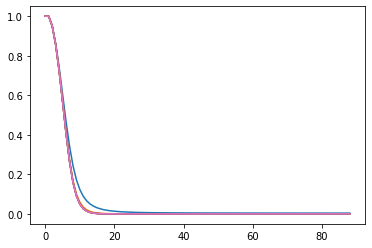

In [577]:
plt.plot(state_hist.to('cpu')[:,3*layer_num:])

### Learn the parameter

In [ ]:
#Set how many epoch?
for ep in range(epochs):
    epoch_loss = 0
    for s_in, a_in, t_in, y in trainloader:
        
        a_in = a_in.to(device)
        s_in = s_in.to(device)
        t_in = s_in.to(device)
        y = y.to(device).squeeze()
        

        # shape feed_in = (batch_size, n_times, 2)
        u = torch.stack([s_in,s_in,t_in], dim=2).squeeze()
        y_pred = greyIdentification(u)

        optimizer.zero_grad()
        loss = loss_fn(y_pred,y)
        loss.backward(retain_graph=True)
        optimizer.step()
        epoch_loss += loss.item()
    
    scheduler.step(epoch_loss)
    print("Epoch {0}: loss is {1}.".format(ep + 1, epoch_loss / train_len))
    
    
#     y_hist_pred = greyIdentification(u_hist)
#     loss = loss_fn(y_hist,y_hist_pred)
#     if ep % 10 == 9:
#         print(ep, loss.item())

    
#     optimizer.zero_grad()

#     # Backward pass: compute gradient of the loss with respect to model
#     # parameters
#     loss.backward(retain_graph=True)#but why

#     # Calling the step function on an Optimizer makes an update to its
#     # parameters
#     optimizer.step()
    
#     #call scheduler
#     scheduler.step()

Epoch 1: loss is 6356032.604838709.
Epoch 2: loss is 6156171.2822580645.
Epoch 3: loss is nan.
Epoch 4: loss is nan.
Epoch 5: loss is nan.
Epoch 6: loss is nan.
Epoch 7: loss is nan.
Epoch 8: loss is nan.
Epoch 9: loss is nan.
Epoch 10: loss is nan.
Epoch 11: loss is nan.
Epoch 12: loss is nan.
Epoch 13: loss is nan.
Epoch 14: loss is nan.
Epoch 15: loss is nan.
Epoch 16: loss is nan.
Epoch 17: loss is nan.
Epoch 18: loss is nan.
Epoch 19: loss is nan.
Epoch 20: loss is nan.
Epoch 21: loss is nan.
Epoch 22: loss is nan.
Epoch 23: loss is nan.
Epoch 24: loss is nan.
Epoch 25: loss is nan.
Epoch 26: loss is nan.
Epoch 27: loss is nan.
Epoch 28: loss is nan.
Epoch 29: loss is nan.
Epoch 30: loss is nan.
Epoch 31: loss is nan.
Epoch 32: loss is nan.
Epoch 33: loss is nan.
Epoch 34: loss is nan.
Epoch 35: loss is nan.
Epoch 36: loss is nan.
Epoch 37: loss is nan.
Epoch 38: loss is nan.


In [547]:
y_pred

tensor([[204.7490, 204.8300, 199.4270, 207.7520, 207.4340, 206.9350, 207.6830],
        [148.8460, 141.8653, 200.3581, 206.6313, 204.4567, 206.6551, 207.1196],
        [107.8112,  97.9093, 186.0825, 186.4904, 202.6127, 206.2107, 205.8066],
        [ 78.0251,  67.0676, 164.5510, 158.8272, 197.5732, 199.7610, 204.2824],
        [ 56.8284,  45.7944, 140.5987, 129.8921, 188.2384, 186.7476, 201.8366],
        [ 41.5480,  31.4837, 117.5622, 103.0138, 175.0516, 168.7362, 197.6640],
        [ 30.4140,  21.6463,  97.0255,  80.1115, 159.3231, 147.8548, 191.2637],
        [ 22.3615,  14.9393,  79.1528,  61.4752, 142.6531, 126.2718, 182.5754],
        [ 16.5666,  10.4269,  63.9473,  46.5701, 125.9227, 105.6634, 172.0137],
        [ 12.3507,   7.3486,  51.2703,  34.8839, 109.6565,  86.8147, 160.0793],
        [  9.2585,   5.2248,  40.8581,  25.8764,  94.3444,  70.1040, 147.1382],
        [  6.9285,   3.6957,  32.4040,  19.0288,  80.3194,  55.7121, 133.6183],
        [  5.2828,   2.7197,  25.5883,  

In [ ]:
greyIdentification.input_scale

In [119]:
greyIdentification.K

Parameter containing:
tensor([-2.1636,  0.0270, -0.3220, -1.8716, -1.2107, -0.5198, -0.4577, -0.7313],
       device='cuda:0', requires_grad=True)

In [120]:
greyIdentification.d

Parameter containing:
tensor([-1.5408, -1.6528, -0.1959, -0.0939], device='cuda:0',
       requires_grad=True)

#### Save Model

In [100]:
def save_model(model, filename):
    try:
        do_save = input('Do you want to save the model (type yes to confirm)? ').lower()
        if do_save == 'yes':
            torch.save(model.state_dict(), filename)
            print('Model saved to %s.' % (filename))
        else:
            print('Model not saved.')
    except:
        raise Exception('The notebook should be run or validated with skip_training=True.')


def load_model(model, filename, device):
    model.load_state_dict(torch.load(filename, map_location=lambda storage, loc: storage))
    print('Model loaded from %s.' % filename)
    model.to(device)
    model.eval()

In [132]:
skip_training=T
if not skip_training:
    save_model(greyIdentification, 'greyIdentification.pth')
    
else:
    n_levels = len(selected_cols)
    model = CustomRnn(n_levels, use_true_params=False)
    load_model(greyIdentification, 'greyIdentification.pth', device)

Do you want to save the model (type yes to confirm)?  y


Model not saved.


In [302]:
torch.max(torch.tensor([1.,-1,0.]),torch.zeros(3))

tensor([1., 0., 0.])